<a href="https://colab.research.google.com/github/Waleed-Azam/1D-CNN/blob/master/Real%20code%20for%20estimation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [114]:
# Need to define a window? Done....
# need to make a sliding window which can predit ? Done...
#It can do that, okay now need to think how I can add labels to perform conparision and estimate a distance.0,00
,

''

In [0]:
#How to estimate the data using the labels and the values at that moment to make it very real to the nearest value.

In [0]:
#data preprocessing
import pandas as pd
#math operations
import numpy as np
#data visualization
import matplotlib.pyplot as plt
#host-os operations
import os
from os import listdir, makedirs, path
from os.path import isfile, join, basename, splitext, isfile, exists
from pathlib import Path
#import keras.utils as utils
from tqdm import tqdm_notebook
from keras.preprocessing import sequence
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Conv1D, MaxPooling1D, Embedding, GlobalAveragePooling1D
from keras.optimizers import adam
from keras.callbacks import Callback, EarlyStopping, ModelCheckpoint, ReduceLROnPlateau
from keras.utils import plot_model
from keras import optimizers
# Graphic output
from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot

In [0]:
# Ploting the data head and the tail and try to estimate with the labels

In [0]:
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials
import numpy as np 
import matplotlib.pyplot as plt

In [0]:
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [0]:
downloaded = drive.CreateFile({'id':'1agv3WTJF7GiaUwWJGDpDQfZwX_nApM-J'}) # replace the id with id of file you want to access'}) # replace the id with id of file you want to access
#https://drive.google.com/file/d/1agv3WTJF7GiaUwWJGDpDQfZwX_nApM-J/view?usp=sharing

In [0]:
downloaded.GetContentFile('Dataa_True.csv')

In [0]:

import pandas as pd
df2 = pd.read_csv('Dataa_True.csv') 
df2

In [0]:
df2

In [0]:
df2["TRUE"] = df2["TRUE"].fillna(0)

In [0]:
df2["Srac"] = df2["Srac"].fillna(0)

In [0]:
df2

In [0]:
X=df2['TRUE']

In [173]:
X

0         0.000000
1        20.000000
2        20.000000
3        20.000000
4        20.000000
           ...    
49996     2.367222
49997     2.366861
49998     2.366521
49999     2.366202
50000     2.365877
Name: TRUE, Length: 50001, dtype: float64

In [0]:
#Reshaping X
X=X.values

In [175]:
X

array([ 0.      , 20.      , 20.      , ...,  2.366521,  2.366202,
        2.365877])

In [0]:
y=df2['Srac']

In [177]:
y

0        20.000000
1        20.000000
2        20.000000
3        20.000000
4        20.000000
           ...    
49996     2.564293
49997     2.564267
49998     2.564253
49999     2.564248
50000     0.000000
Name: Srac, Length: 50001, dtype: float64

In [0]:
#Reshaping y
y=y.values

In [179]:
y

array([20.      , 20.      , 20.      , ...,  2.564253,  2.564248,
        0.      ])

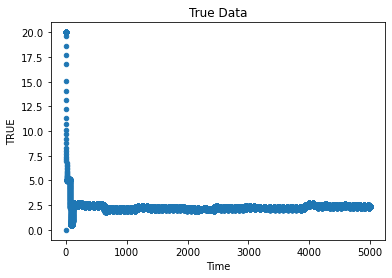

In [180]:
ax = plt.gca()

df2.plot(kind='scatter',x='Time',y='TRUE',ax=ax)
#df.plot(kind='scatter',x='Time',y='DVL2', color='red', ax=ax)
#df.plot(kind='scatter',x='Time',y='DVL3', color='green', ax=ax)
#df.plot(kind='line',x='Time',y='DVL4', color='yellow', ax=ax)
plt.title('True Data')
plt.show()  #Ground Truth, Labels

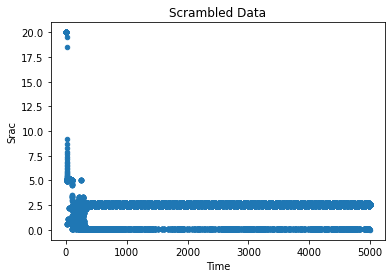

In [181]:
ax = plt.gca()

df2.plot(kind='scatter',x='Time',y='Srac',ax=ax)
#df.plot(kind='scatter',x='Time',y='DVL2', color='red', ax=ax)
#df.plot(kind='scatter',x='Time',y='DVL3', color='green', ax=ax)
#df.plot(kind='line',x='Time',y='DVL4', color='yellow', ax=ax)
plt.title('Scrambled Data')
plt.show()  #Ground Truth, Labels

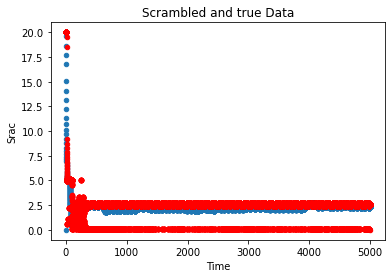

In [182]:
ax = plt.gca()

df2.plot(kind='scatter',x='Time',y='TRUE',ax=ax)
df2.plot(kind='scatter',x='Time',y='Srac', color='red', ax=ax)
#df.plot(kind='scatter',x='Time',y='DVL3', color='green', ax=ax)
#df.plot(kind='line',x='Time',y='DVL4', color='yellow', ax=ax)
plt.title('Scrambled and true Data')
plt.legend
plt.show()  #Ground Truth, Labels

In [183]:

X

array([ 0.      , 20.      , 20.      , ...,  2.366521,  2.366202,
        2.365877])

In [0]:
X

In [184]:
X.shape

(50001,)

In [0]:
y1=y

In [187]:
y1

array([20.      , 20.      , 20.      , ...,  2.564253,  2.564248,
        0.      ])

In [188]:
y1.shape

(50001,)

In [0]:
#Here I have X and y, now using the fact that I have value of the both X and y, I need to estimate that value each time with the label value and need to estiamte
#this value in the proper way. :)

In [0]:
#Creating labels before feeding them in to the neural networks 

In [0]:
X_train  = np.array(X[:45000])
y_train = np.array(y[:45000])

X_test = np.array(X[45000:])
y_test = np.array(y[45000:])

In [192]:
X_test

array([2.437157, 2.437004, 2.436871, ..., 2.366521, 2.366202, 2.365877])

In [193]:
X_train

array([ 0.      , 20.      , 20.      , ...,  2.437603,  2.437435,
        2.437286])

In [194]:
len(X_train)

45000

In [195]:
len(X_test)

5001

In [196]:
len(y_train)

45000

In [197]:
len(y_test)

5001

In [198]:
X_train.shape

(45000,)

In [199]:
X_test.shape

(5001,)

In [200]:
y_train.shape

(45000,)

In [201]:

y_test.shape

(5001,)

In [202]:
n_steps

3

In [203]:
X_train

array([ 0.      , 20.      , 20.      , ...,  2.437603,  2.437435,
        2.437286])

In [204]:
X_train.shape

(45000,)

In [205]:
y_train.shape

(45000,)

In [206]:
y1

array([20.      , 20.      , 20.      , ...,  2.564253,  2.564248,
        0.      ])

In [207]:
y1.shape

(50001,)

In [0]:
# split a univariate sequence into samples
def split_sequence(sequence, n_steps):
	X, y = list(), list()
	for i in range(len(sequence)):
		# find the end of this pattern
		end_ix = i + n_steps
		# check if we are beyond the sequence
		if end_ix > len(sequence)-1:
			break
		# gather input and output parts of the pattern
		seq_x, seq_y = sequence[i:end_ix], sequence[end_ix]
		X.append(seq_x)
		y.append(seq_y)
	return array(X), array(y)

In [0]:
# define input sequence
raw_seq = X_train
# choose a number of time steps
n_steps = 3
# split into samples
X, y = split_sequence(raw_seq, n_steps)
# summarize the data
for i in range(len(X)):
	print(X[i], y[i])

In [210]:
y

array([20.      , 20.      , 20.      , ...,  2.437603,  2.437435,
        2.437286])

In [211]:
y.shape

(44997,)

In [212]:
y_train.shape

(45000,)

In [218]:
for i in range (X_train):
  for j in range (y_train):
    for k in range (y):
      if (y_train[j]-y[k]>0):
        y[k]=y_train[j]
        else:
        y[k]=y_train[j]
print(y_train, X_train)


SyntaxError: ignored

In [0]:
#Things left
#Model
#Evaluate Model
#evaluation curve
#Prediction curves